# PROJECT SPRINT 10: A/B TESTING

### DESCRIPTION OF THE PROJECT: This is a test and analysis done for a big online store. Together with the marketing department, I received a list of hypotheses that may help boost revenue.<br>

### PURPOSE OF THE TEST: **Prioritize these hypotheses, launch A/B test and analyze the results.** 

***

### The project is divided into several parts. Each part has its own purpose and is outlined in a sequencial order so you can follow the progress to the end.<br>

>### Part One: Pre-processing of the data.<br>
>### Part Two: Check Compliances.<br>
>### Part Three: Main KPIs (without statistical analysis).<br>
>### Part Four: Prioritizing Hypotheses.<br>
>### Part Five: A/B Test Analysis.<br>
>### Part Six: Conlusions based on the A/B test results.

***

### Description of the data:<br>
> Hypotheses dataset:<br>
> Hypotheses — brief descriptions of the hypotheses<br>
> Reach — user reach, on a scale of one to ten<br>
> Impact — impact on users, on a scale of one to ten<br>
> Confidence — confidence in the hypothesis, on a scale of one to ten<br>
> Effort — the resources required to test a hypothesis, on a scale of one to ten.<br>

> Orders dataset:<br>
> transactionId — order identifier<br>
> visitorId — identifier of the user who placed the order<br>
> date — of the order<br>
> revenue — from the order<br>
> group — the A/B test group that the user belongs to<br>

> Visits dataset:<br>
> date — date<br>
> group — A/B test group<br>
> visits — the number of visits on the date specified in the A/B test group specified

***

### Part One: Pre-processing the data

#### In this part I will import libraries, check and clean the data from both datasets, and check any inconsistencies of the data that may prevent to do further actions and analysis.

**1. Libraries**

In [655]:
# import all the necessary libraries for the whole project
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import sidetable
import plotly.express as px 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 

**2. Reading the datasets and checking for missing values**

In [656]:
# reading the orders csv file
orders = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_10/project/orders_us.csv', parse_dates=['date'])
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [657]:
# info about the dataframe
orders.stb.missing(style=True)

,missing,total,percent
transactionId,0,"1,197",0.00%
visitorId,0,"1,197",0.00%
date,0,"1,197",0.00%
revenue,0,"1,197",0.00%
group,0,"1,197",0.00%


* We can see that there are 1197 rows and no missing vallues.

In [658]:
# reading the visits csv file
visits = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_10/project/visits_us.csv', parse_dates=['date'])
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [659]:
# info about the visits dataframe
visits.stb.missing(style=True)

,missing,total,percent
date,0,62,0.00%
group,0,62,0.00%
visits,0,62,0.00%


* We can see that there are 62 rows and no missing values.

In [660]:
# reading the hypotheses csv file
pd.set_option('display.max_colwidth', None)
hypotheses = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_10/project/hypotheses_us.csv')
hypotheses

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1,Launch your own delivery service. This will shorten delivery time;2;5;4;10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4,Change the background color on the main page. This will increase user engagement;3;1;1;1
5,Add a customer review page. This will increase the number of orders;3;2;2;3
6,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3
7,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5
8,Launch a promotion that gives users discounts on their birthdays;1;9;9;5


* We can see that the format is not the correct one to manipulate the data on the dataframe so I will modify the format to make columns.

In [661]:
# define the data as a list of dictionaries
hypotheses = [
    {"Hypothesis": "Add two new channels for attracting traffic. This will bring 30% more users", "Reach": 3, "Impact": 10, "Confidence": 8, "Effort": 6},
    {"Hypothesis": "Launch your own delivery service. This will shorten delivery time", "Reach": 2, "Impact": 5, "Confidence": 4, "Effort": 10},
    {"Hypothesis": "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size", "Reach": 8, "Impact": 3, "Confidence": 7, "Effort": 3},
    {"Hypothesis": "Change the category structure. This will increase conversion since users will find the products they want more quickly", "Reach": 8, "Impact": 3, "Confidence": 3, "Effort": 8},
    {"Hypothesis": "Change the background color on the main page. This will increase user engagement", "Reach": 3, "Impact": 1, "Confidence": 1, "Effort": 1},
    {"Hypothesis": "Add a customer review page. This will increase the number of orders", "Reach": 3, "Impact": 2, "Confidence": 2, "Effort": 3},
    {"Hypothesis": "Show banners with current offers and sales on the main page. This will boost conversion", "Reach": 5, "Impact": 3, "Confidence": 8, "Effort": 3},
    {"Hypothesis": "Add a subscription form to all the main pages. This will help you compile a mailing list", "Reach": 10, "Impact": 7, "Confidence": 8, "Effort": 5},
    {"Hypothesis": "Launch a promotion that gives users discounts on their birthdays; This will increase customer retention", "Reach": 1, "Impact": 9, "Confidence": 9, "Effort": 5},
]
# create the DataFrame
hypotheses = pd.DataFrame(hypotheses)
# Convert column names to lowercase
hypotheses.columns = hypotheses.columns.str.lower()
hypotheses


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays; This will increase customer retention,1,9,9,5


In [662]:
# checking for duplicates on column of transactions
duplicates = orders['transactionId'].duplicated().sum()
if duplicates > 0:
  print(f'There are {duplicates} duplicate rows in the DataFrame.')
else:
  print('No duplicate rows found.')

No duplicate rows found.


* We can see that there are no duplicated transactions on the dataframe.

In [663]:
# group by test group and see when start and when ends the test
orders.groupby(['group'])['date'].agg(['min','max'])

,min,max
group,,
A,2019-08-01,2019-08-31
B,2019-08-01,2019-08-31


* We can see that both orders and visits dataframes have same start and end dates.

***

### Part Two: Check compliances

#### In this part I will go through all the technical requirements that need to be fulfilled in order to perform a correct test.

In [664]:
# group by group to see how many users on each group
orders.groupby(['group'])['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

* We can see there is not an even split of the groups, I will check if there are users that are included on both groups by error on the next step.

In [665]:
# pylint: disable=missing-final-newline
# users in both groups
both_groups = list(orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group > 1')['visitorId'])
both_groups

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]

In [666]:
# not in both groups
clean_orders = orders[(orders.visitorId.apply(lambda x: x not in both_groups))]
clean_orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


* We can see now that the clean list of users which is valid for the test is the users that are only participating in one version of the test.

In [667]:
# group by group to see how many users on each group
clean_orders.groupby(['group'])['visitorId'].nunique()

group
A    445
B    528
Name: visitorId, dtype: int64

* We can see that there is an uneven number of users that take part of group A and B to do the test. The difference is quite significant to continue correctly the test.

In [668]:
# double checking if there are still users on both groups
(clean_orders.groupby(['visitorId'])['group'].nunique()>1).sum()

0

* We can see that now each user if participiating only in one only version of the test. The rest of users were dropped from the test.

#### Note: We don't have data on this data sets about the existence of any marketing events during this period of August, neither the existence of special promotions or holidays. Therefore, we infer that the planned dates for the test are normal dates that retrieve a usual user behavior.

* We can also infer that there is not existence of ghosts users on the data set, users that are registered but don't take part on any of the versions of the test. I can see that from the missing values and the columns earlier on the datasets information.

***

### Part Three: KPIs

In [669]:
ordersAggregated = datesGroups.apply(lambda x: clean_orders[
    np.logical_and(clean_orders['date'] <= x['date'], clean_orders['group'] == x['group'])
].agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique,
       'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1)
ordersAggregated = ordersAggregated.sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(lambda x: visits[
    np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])
].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1)
visitorsAggregated = visitorsAggregated.sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


In [670]:
# dataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
# dataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

In [671]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = cumulativeRevenueA['date'], 
                        y = cumulativeRevenueA['revenue'],
                    mode = 'lines',
                    name = 'A', line = dict(color = 'orange', width = 2 )))
fig.add_trace(go.Scatter(x = cumulativeRevenueB['date'], 
                        y = cumulativeRevenueB['revenue'], 
                    mode = 'lines',
                    name = 'B', line = dict(color = 'blue', width = 2 )))

fig.update_layout(autosize = False, width = 800, height = 500, margin = dict(
        l = 50, r = 50, b = 100, t = 100, pad = 4), paper_bgcolor = 'LightSteelBlue',
                  xaxis_tickformat = '%d %b <br>%Y', 
                  title_text = 'date')
# Customize y-axis label
fig.update_yaxes(title_text = 'visitors')  # Add y-axis label
# Add title to the plot
fig.update_layout(title_text = 'Cumulative Revenue for A and B groups')
fig.update_layout(
    showlegend = True)
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [672]:
# pylint: disable=undefined-variable
fig = go.Figure()
fig.add_trace(go.Scatter(x = cumulativeRevenueA['date'], 
                        y = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
                    mode = 'lines',
                    name = 'A', line = dict(color = 'green', width = 2 )))
fig.add_trace(go.Scatter(x = cumulativeRevenueB['date'], 
                        y = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
                    mode = 'lines',
                    name = 'B', line = dict(color = 'purple', width = 2 )))

fig.update_layout(autosize = False, width = 800, height = 500, margin = dict(
        l = 50, r = 50, b = 100, t = 100, pad = 4), paper_bgcolor = 'LightSteelBlue',
                  xaxis_tickformat = '%d %b <br>%Y', 
                  title_text = 'date')
# Customize y-axis label
fig.update_yaxes(title_text = 'average purchase size')  # Add y-axis label
# Add title to the plot
fig.update_layout(title_text = 'Average Purchase Size for A and B groups')
fig.update_layout(
    showlegend = True)
fig.show()

In [673]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


In [674]:
# relative difference for the average purchase sizes
mergedCumulativeRevenue['relative_difference'] = (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB,relative_difference
0,2019-08-01,2266.6,23,967.2,17,-0.422675
1,2019-08-02,3734.9,42,3535.3,40,-0.006114
2,2019-08-03,5550.1,66,4606.9,54,0.014514
3,2019-08-04,6225.6,77,6138.5,68,0.116511
4,2019-08-05,7623.6,99,7587.8,89,0.107136


In [675]:
# plotting relative difference for the average purchase sizes
fig = px.line(mergedCumulativeRevenue,
              x = 'date',
              y = 'relative_difference',
              title = 'Relative Difference for Average purchase Size')
#adding reference line
fig.add_hline(y = 0,
              line_dash = 'dash',
              line_color = 'purple')
fig.update_layout(autosize = False, width = 800, height = 500, margin = dict(
        l = 50, r = 50, b = 100, t = 100, pad = 4), paper_bgcolor = 'LightSteelBlue',
                  xaxis_tickformat = '%d %b <br>%Y')
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [676]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,17,17,967.2,713,0.023843
2,2019-08-02,A,42,36,3734.9,1338,0.031390
3,2019-08-02,B,40,39,3535.3,1294,0.030912
4,2019-08-03,A,66,60,5550.1,1845,0.035772


In [677]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [678]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = cumulativeDataA['date'], 
                        y = cumulativeDataA['conversion'],
                    mode = 'lines',
                    name = 'A', line = dict(color = 'green', width = 2 )))
fig.add_trace(go.Scatter(x = cumulativeDataB['date'], 
                        y = cumulativeDataB['conversion'], 
                    mode = 'lines',
                    name = 'B', line = dict(color = 'purple', width = 2 )))

fig.update_layout(autosize = False, width = 800, height = 500, margin = dict(
        l = 50, r = 50, b = 100, t = 100, pad = 4), paper_bgcolor = 'LightSteelBlue',
                  xaxis_tickformat = '%d %b <br>%Y', 
                  title_text = 'date')
# Customize y-axis label
fig.update_yaxes(title_text = 'cumulative conversion')  # Add y-axis label
# Add title to the plot
fig.update_layout(title_text = 'Cumulative Conversion for A and B groups')
fig.update_layout(
    showlegend = True)
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [679]:
# merge cumulative conversions
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A', 'B'])
mergedCumulativeConversions['ratio_conversions'] = mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA'] - 1
# plot a relative difference graph for the cumulative conversion rates
fig = px.line(mergedCumulativeConversions,
              x = 'date',
              y = 'ratio_conversions',
              title = 'Relative Difference for Cumulative Conversion')
#adding reference line
fig.add_hline(y = 0,
              line_dash = 'dash',
              line_color = 'purple')
fig.update_layout(autosize = False, width = 800, height = 500, margin = dict(
        l = 50, r = 50, b = 100, t = 100, pad = 4), paper_bgcolor = 'LightSteelBlue',
                  xaxis_tickformat = '%d %b <br>%Y')
fig.show()

/Users/cesarchaparro/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


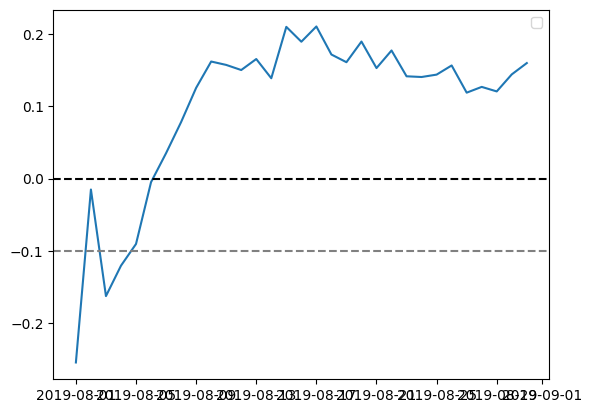

In [680]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

In [681]:
# revenue per user
revenue_per_user = clean_orders.groupby(['visitorId'])['revenue'].sum().reset_index()
revenue_per_user.columns = ['visitorId', 'revenue']
revenue_per_user

,visitorId,revenue
0,5114589,10.8
1,6958315,25.9
2,11685486,100.4
3,39475350,65.4
4,47206413,15.2
...,...,...
968,4259830713,50.1
969,4278982564,385.7
970,4279090005,105.3
971,4281247801,45.6


In [682]:
# see distribution of revenue per user
revenue_per_user['revenue'].describe()

count      973.000000
mean       136.550051
std        663.321828
min          5.000000
25%         20.800000
50%         50.400000
75%        135.200000
max      19920.400000
Name: revenue, dtype: float64

In [683]:
# Plot the distribution of revenue per user
fig = px.histogram(revenue_per_user['revenue'],
                   x = 'revenue',
                   title = 'Revenue per User Distribution',
                   nbins = 100)
# Update the y-axis label
fig.update_yaxes(title_text= 'users')
fig.show()

***

### Part Four: Prioritizing hypotheses

In [684]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays; This will increase customer retention,1,9,9,5


In [687]:
# apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays; This will increase customer retention,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


In [689]:
# apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays; This will increase customer retention,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


#### From the two prioritization of hypotheses using ICE and RICE I can infer:<br>

* ICE prioritizes based on the following factors:<br>

> Reach (R): The number of users potentially affected by the hypothesis.<br>
> Impact (I): The expected impact of the hypothesis on a relevant metric (e.g., conversion rate, revenue).<br>
> Confidence (C): The level of certainty in your estimates for Reach and Impact.<br>

* RICE prioritizes based on the following factors:<br>

> Reach (R): Same as ICE.<br>
> Impact (I): Similar to ICE, but can consider effort required to implement the hypothesis.<br>
> Confidence (C): Similar to ICE.<br>
> Effort (E): The amount of time and resources needed to implement the hypothesis.<br>

* Changes in Prioritization:<br>

> Subscription form: With RICE, the "subscription form" hypothesis jumps to the top due to its high Reach and potentially high Impact on acquiring leads (assuming a good conversion rate).<br>
> Product recommendations: This hypothesis also moves up significantly in RICE due to a balance between Reach, Impact, and lower Effort compared to some ideas in ICE.<br>
> Discounts and new channels: While still considered valuable, these drop in priority with RICE because the Effort to implement them might be higher.<br>

* Key Takeaways:<br>

> RICE incorporates effort into the prioritization, potentially favoring ideas with high potential impact but lower implementation complexity.<br>
> If user base growth and immediate impact are critical, ICE might be suitable.<br>
> If resource allocation and long-term value are essential, RICE might be a better choice.

***

### Part Five: A/B Test Analysis